## Kmean Clustering Algorithm

#### Importing libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
from google.colab import files
uploade = files.upload()

Saving ^JKSE.csv to ^JKSE (14).csv


In [ ]:
df = pd.read_csv('^JKSE.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,4580.165039,4603.824219,4525.918945,4525.918945,4525.918945,21276600.0
1,2016-01-05,4527.431152,4594.340820,4527.003906,4557.821777,4557.821777,24364900.0
2,2016-01-06,4563.653809,4639.236816,4562.573242,4608.981934,4608.981934,29976300.0
3,2016-01-07,4573.692871,4577.636230,4530.448242,4530.448242,4530.448242,24018600.0
4,2016-01-08,4524.862793,4550.907227,4507.414063,4546.288086,4546.288086,23991300.0


In [ ]:
df=df.iloc[:,1:7]
df

,Open,High,Low,Close,Adj Close,Volume
0,4580.165039,4603.824219,4525.918945,4525.918945,4525.918945,21276600.0
1,4527.431152,4594.340820,4527.003906,4557.821777,4557.821777,24364900.0
2,4563.653809,4639.236816,4562.573242,4608.981934,4608.981934,29976300.0
3,4573.692871,4577.636230,4530.448242,4530.448242,4530.448242,24018600.0
4,4524.862793,4550.907227,4507.414063,4546.288086,4546.288086,23991300.0
...,...,...,...,...,...,...
1480,6716.157227,6732.897949,6662.538086,6677.875977,6677.875977,186336800.0
1481,6697.423828,6698.414063,6668.054199,6683.276855,6683.276855,224587000.0
1482,6694.957031,6751.001953,6694.796875,6699.346191,6699.346191,215655400.0
1483,6688.568848,6691.711914,6544.895996,6561.553223,6561.553223,242523500.0


In [ ]:
df.shape

(1485, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1436 non-null   float64
 1   High       1436 non-null   float64
 2   Low        1436 non-null   float64
 3   Close      1436 non-null   float64
 4   Adj Close  1436 non-null   float64
 5   Volume     1436 non-null   float64
dtypes: float64(6)
memory usage: 69.7 KB


In [ ]:
df.isnull().sum()

Open         49
High         49
Low          49
Close        49
Adj Close    49
Volume       49
dtype: int64

In [ ]:
df= df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
0,4580.165039,4603.824219,4525.918945,4525.918945,4525.918945,21276600.0
1,4527.431152,4594.340820,4527.003906,4557.821777,4557.821777,24364900.0
2,4563.653809,4639.236816,4562.573242,4608.981934,4608.981934,29976300.0
3,4573.692871,4577.636230,4530.448242,4530.448242,4530.448242,24018600.0
4,4524.862793,4550.907227,4507.414063,4546.288086,4546.288086,23991300.0
...,...,...,...,...,...,...
1480,6716.157227,6732.897949,6662.538086,6677.875977,6677.875977,186336800.0
1481,6697.423828,6698.414063,6668.054199,6683.276855,6683.276855,224587000.0
1482,6694.957031,6751.001953,6694.796875,6699.346191,6699.346191,215655400.0
1483,6688.568848,6691.711914,6544.895996,6561.553223,6561.553223,242523500.0


In [ ]:
from sklearn.preprocessing import StandardScaler
features = df.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)

In [ ]:
X_scaled.shape

(1436, 6)

Determining optimal number of components for PCA looking at the explained variance as a function of the components

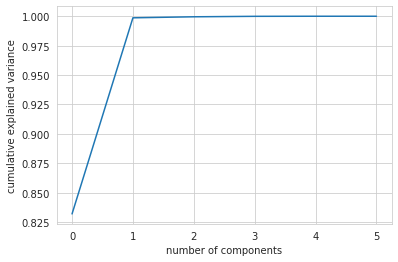

In [ ]:
sns.set_style('whitegrid')
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Here we see that we'd need about 100 components to retain 100% of the variance. Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations

#### Apply PCA to reduce the number of dimensions from 502 to 2 dimensions for better data visualization.

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
print('explained variance :')
print('--------------------------------------------------------------------')
print(pca.explained_variance_)
print('--------------------------------------------------------------------')
print('PCA Components : ')
print('--------------------------------------------------------------------')
print(pca.components_)
print('--------------------------------------------------------------------')
X_transformed = pca.transform(X_scaled)
print('Transformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_transformed[:5,:])
print('--------------------------------------------------------------------')
print('Transformed Feature shape :')
print('--------------------------------------------------------------------')
print(X_transformed.shape)
print('--------------------------------------------------------------------')
print('Original Feature shape :')
print('--------------------------------------------------------------------')
print(X_scaled.shape)
print('--------------------------------------------------------------------')
print('Restransformed Feature shape :')
print('--------------------------------------------------------------------')
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)
print('--------------------------------------------------------------------')
print('Retransformed Feature values first five rows :')
print('--------------------------------------------------------------------')
print(X_retransformed[:5,:])
print('--------------------------------------------------------------------')

explained variance :
--------------------------------------------------------------------
[4.99554548 1.00063684]
--------------------------------------------------------------------
PCA Components : 
--------------------------------------------------------------------
[[-4.46963992e-01 -4.47261249e-01 -4.47237108e-01 -4.47293562e-01
  -4.47293562e-01  4.05869120e-03]
 [ 2.65452325e-03  3.50180782e-03  6.86046821e-04  1.11685170e-03
   1.11685170e-03  9.99988863e-01]]
--------------------------------------------------------------------
Transformed Feature values first five rows :
--------------------------------------------------------------------
[[ 4.67486171 -0.25484168]
 [ 4.67263283 -0.24730994]
 [ 4.5029234  -0.23262757]
 [ 4.68972989 -0.24816567]
 [ 4.74142691 -0.2485864 ]]
--------------------------------------------------------------------
Transformed Feature shape :
--------------------------------------------------------------------
(1436, 2)
--------------------------------

#### Problem 1:¶
 There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

#### Finding optimum number of clusters for KMEANS cluster

In [ ]:
X_transformed.shape

(1436, 2)

In [ ]:
!pip install scikit-plot

#### Elbow method 

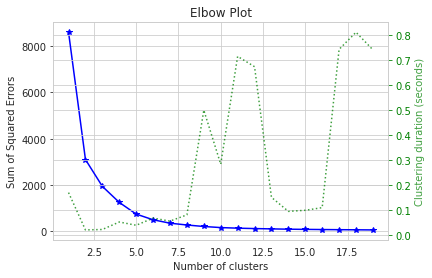

In [ ]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),X_transformed,cluster_ranges=range(1,20))

Optimum number of cluster from the elbow method is determined to be 5

#### Applying K-Means Clustering to find stocks which are similar in performance

In [ ]:
X_train = pd.DataFrame(X_transformed)
X_train.rename(columns = {0:"Open", 1:"Close"})

,Open,Close
0,4.674862,-0.254842
1,4.672633,-0.247310
2,4.502923,-0.232628
3,4.689730,-0.248166
4,4.741427,-0.248586
...,...,...
1431,-3.618930,0.190675
1432,-3.589896,0.285854
1433,-3.674581,0.263969
1434,-3.293628,0.329913


#### Kmean Algorithm

In [ ]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_train)
y_kmeans = k_means.fit_predict(X_train)
labels = k_means.labels_

In [ ]:
len(labels), X_train.shape

(1436, (1436, 2))

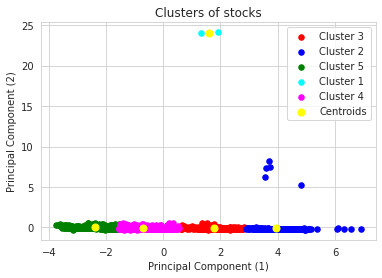

In [ ]:
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 5')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Cluster 4')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

The above 5 clusters shows the stocks which are similar in stock performance

In [ ]:
import pickle

filename = 'final_model_Kmean_clustring.pkl'
pickle.dump(k_means, open(filename, 'wb'))